# Árboles de Decisión

In [1]:
import pandas as pd

In [2]:
pacientes=pd.read_csv("Pacientes2.csv", engine="python", index_col=0)

In [4]:
pacientes.head(10)

,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0
6,NO,0,0,1,0,1,38,0,0,0,0
7,SI,1,1,1,0,1,56,1,0,0,0
8,NO,0,0,1,0,1,53,0,1,0,0
10,SI,1,1,1,1,1,48,0,0,0,0


In [5]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 1 to 909
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Enfermedad  985 non-null    object
 1   HIPERTEN    985 non-null    int64 
 2   HIPERGLU    985 non-null    int64 
 3   HDLBAJA     985 non-null    int64 
 4   HIPERTRI    985 non-null    int64 
 5   CINTALTA    985 non-null    int64 
 6   EDAD        985 non-null    int64 
 7   GENERO      985 non-null    int64 
 8   FUMA        985 non-null    int64 
 9   ALCOHOL     985 non-null    int64 
 10  POLIURIA    985 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 92.3+ KB


Separamos las columnas de las variables predictoras de la columna que contiene la variable a predecir

In [7]:
# Variables predictoras
X = pacientes.iloc[:,1:11]

#Variable a predecir
Y = pacientes.iloc[:,0]

X.head()

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,
1,0,0,1,0,0,38,0,0,0,0
2,0,1,1,1,1,49,1,0,0,0
3,1,1,0,1,1,59,1,0,0,1
4,1,1,0,0,0,44,0,0,0,0
5,0,0,1,0,0,42,0,0,0,0


Dividimos nuestros datos en las tablas de testing y training

In [8]:
from sklearn.model_selection import train_test_split

# X_train y Y_train para entrenamiento
# Y_test y Y_test para prueba

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.75, random_state=0)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 731 to 28
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   HIPERTEN  738 non-null    int64
 1   HIPERGLU  738 non-null    int64
 2   HDLBAJA   738 non-null    int64
 3   HIPERTRI  738 non-null    int64
 4   CINTALTA  738 non-null    int64
 5   EDAD      738 non-null    int64
 6   GENERO    738 non-null    int64
 7   FUMA      738 non-null    int64
 8   ALCOHOL   738 non-null    int64
 9   POLIURIA  738 non-null    int64
dtypes: int64(10)
memory usage: 63.4 KB


Creamos el modelo del árbol de decisión

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Llamamos al constructor del Árbol de Decisión

arbol = DecisionTreeClassifier(max_depth=4)

# Entrenamos el modelo
arbol_enfermedad = arbol.fit(X_train, Y_train)

### Gráfica del Árbol de decisión

**Todas las flechas del lado izquierdo pertenecen a la respuesta "verdadero" y las del lado derecho a la respuesta "Falso".

**Los números de fila se asignan aleatoriamente


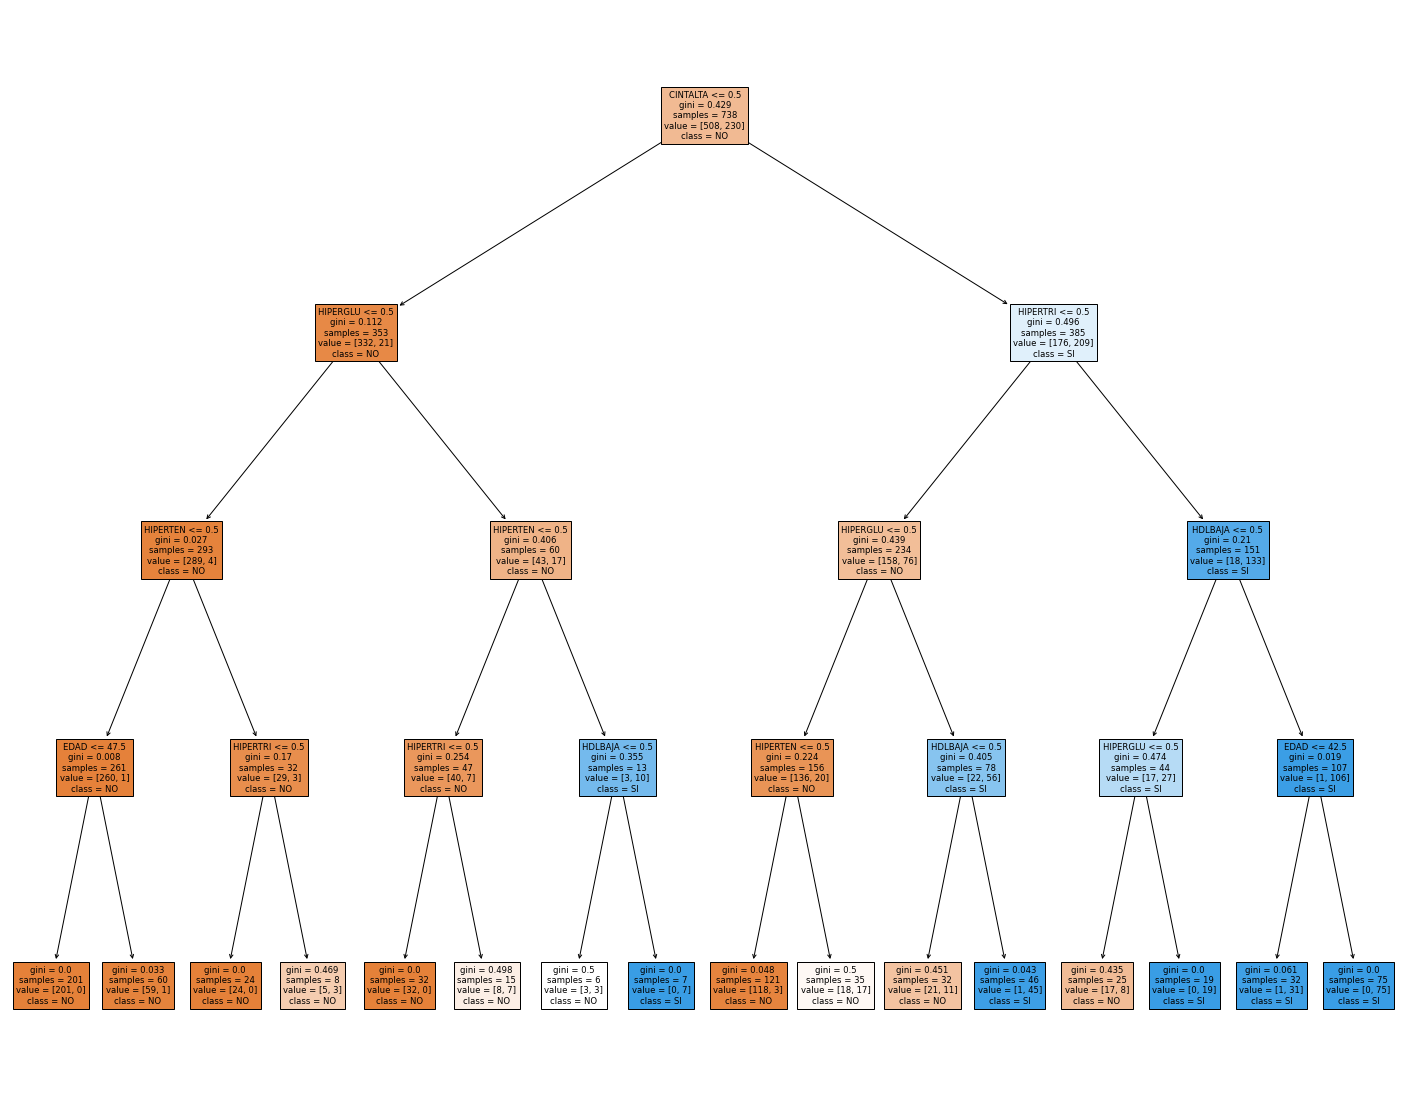

In [11]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20)) #Le indicamos las dimensiones del gráfico

tree.plot_tree(arbol_enfermedad, feature_names=list(X.columns.values),
              class_names=list(Y.values), filled=True)

plt.show()

In [12]:
fig.savefig("Arbdeci.png") #guardar la imagen en .png

Llevamos a cabo la predicción con los datos contenidos en la tabla testing

In [13]:
Y_pred = arbol_enfermedad.predict(X_test)

Y_pred

array(['SI', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'NO', 'NO',
       'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI',
       'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI',
       'NO', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'N

### Precisión del modelo

In [14]:
#Crearemos una matriz de confusión

from sklearn.metrics import confusion_matrix

Matriz_de_Confusion = confusion_matrix(Y_test, Y_pred)

Matriz_de_Confusion

array([[178,   3],
       [ 12,  54]])

Calculamos la precisión global del modelo

In [15]:
import numpy as np 

Precision_global = np.sum(Matriz_de_Confusion.diagonal())/ np.sum(Matriz_de_Confusion)

Precision_global

0.9392712550607287

Calculamos la precisión por cada clase

In [16]:
Precision_no = ((Matriz_de_Confusion[0,0]))/sum(Matriz_de_Confusion[0,])

Precision_no

0.9834254143646409

In [17]:
Precision_si = ((Matriz_de_Confusion[1,1]))/sum(Matriz_de_Confusion[1,])

Precision_si

0.8181818181818182